In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# 1. Load Data

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 19) (478,)
Filtered data shape (493, 1080, 19) (493,)
Filtered data shape (856, 1080, 19) (856,)


In [3]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

# 2. Remove cells from edges of FOV

In [4]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)


New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 19) y train: (452,)


In [5]:
indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)


New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 19) y train: (473,)


In [6]:
indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 19) y train: (804,)


# 3. Overimpose images with segmentations to remove background noise

In [7]:
overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)

In [8]:
overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)

In [9]:
overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

# 4. Getting second generation cells from different cell tracks

In [10]:
indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
second_gen_br1 = filtered_track_br1_no_edges[indexes_daughter_br1]
second_gen_br1_images = overimposed_br1[indexes_daughter_br1]
second_gen_br1_y_train = y_train_br1_no_edges[indexes_daughter_br1]

print("Second generation BR1 shape:", second_gen_br1.shape, "Images shape:", second_gen_br1_images.shape, "y train shape:", second_gen_br1_y_train.shape)

Second generation BR1 shape: (57, 1080, 19) Images shape: (57, 1080, 2, 20, 20) y train shape: (57,)


In [33]:
indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
second_gen_br2 = filtered_track_br2_no_edges[indexes_daughter_br2]
second_gen_br2_images = overimposed_br2[indexes_daughter_br2]
second_gen_br2_y_train = y_train_br2_no_edges[indexes_daughter_br2]

print("Second generation BR2 shape:", second_gen_br2.shape, "Images shape:", second_gen_br2_images.shape, "y train shape:", second_gen_br2_y_train.shape)

Second generation BR2 shape: (63, 1080, 19) Images shape: (63, 1080, 2, 20, 20) y train shape: (63,)


In [36]:
indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
second_gen_br3 = filtered_track_br3_no_edges[indexes_daughter_br3]
second_gen_br3_images = overimposed_br3[indexes_daughter_br3]
second_gen_br3_y_train = y_train_br3_no_edges[indexes_daughter_br3]

print("Second generation BR3 shape:", second_gen_br3.shape, "Images shape:", second_gen_br3_images.shape, "y train shape:", second_gen_br3_y_train.shape)

Second generation BR3 shape: (87, 1080, 19) Images shape: (87, 1080, 2, 20, 20) y train shape: (87,)


## 4.1. Removing residual fates 0,1 from the training set

In [40]:
print(np.unique(second_gen_br1_y_train, return_counts=True))
print(np.unique(second_gen_br2_y_train, return_counts=True))
print(np.unique(second_gen_br3_y_train, return_counts=True))

(array([0, 1, 2, 3]), array([ 3,  2, 33, 19]))
(array([0, 1, 2, 3]), array([ 5,  1, 47, 10]))
(array([0, 1, 2, 3]), array([ 2,  2, 61, 22]))


In [49]:
indexes_with_0_y_train_br1 = np.where(second_gen_br1_y_train == 0)[0]
indexes_with_1_y_train_br1 = np.where(second_gen_br1_y_train == 1)[0]

indexes_with_0_y_train_br2 = np.where(second_gen_br2_y_train == 0)[0]
indexes_with_1_y_train_br2 = np.where(second_gen_br2_y_train == 1)[0]

indexes_with_0_y_train_br3 = np.where(second_gen_br3_y_train == 0)[0]
indexes_with_1_y_train_br3 = np.where(second_gen_br3_y_train == 1)[0]

3
2
5


In [68]:
second_gen_br1_images_ = np.delete(second_gen_br1_images, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_y_train_ = np.delete(second_gen_br1_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_tracks = np.delete(second_gen_br1, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)



second_gen_br2_images_ = np.delete(second_gen_br2_images, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_y_train_ = np.delete(second_gen_br2_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_tracks = np.delete(second_gen_br2, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)




second_gen_br3_images_ = np.delete(second_gen_br3_images, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_y_train_ = np.delete(second_gen_br3_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_tracks = np.delete(second_gen_br3, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)


print(second_gen_br1_images_.shape)
print(second_gen_br1_y_train_.shape)
print(second_gen_br2_images_.shape)
print(second_gen_br2_y_train_.shape)
print(second_gen_br3_images_.shape)
print(second_gen_br3_y_train_.shape)

(52, 1080, 2, 20, 20)
(52,)
(57, 1080, 2, 20, 20)
(57,)
(83, 1080, 2, 20, 20)
(83,)


In [66]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_images.npy", second_gen_br1_images_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_y_train.npy", second_gen_br1_y_train_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_images.npy", second_gen_br2_images_)    
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_y_train.npy", second_gen_br2_y_train_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_images.npy", second_gen_br3_images_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_y_train.npy", second_gen_br3_y_train_)

# 5. Getting second generation cells from same track as mother

In [69]:
def daughter_trace_keep_only(tabular_data, image_data):
    """
    Keeps only information from daughter cells in both tabular and image data.
    
    - For each cell (row) in tabular_data, it finds the first zero in column 4, **ignoring the first time point**.
    - From the beginning up to (but not including) that time point, it sets all values in that row to zero.
    - Values from that time point onward are kept unchanged.
    - The same index is used to set corresponding images in image_data to zero.

    Args:
        tabular_data (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        image_data (numpy.ndarray): A 5D matrix of shape (cells, time, channels, height, width).

    Returns:
        tuple: Processed (tabular_data, image_data) with zeroed-out values from the beginning up to the determined index.
    """
    processed_tabular = tabular_data.copy()
    processed_images = image_data.copy()
    
    for cell_idx, cell in enumerate(processed_tabular):
        # Ignore the first time point and find the first zero in the 4th column (index 3)
        feature_values = cell[1:, 4]  # Start from the second time point
        first_zero_index = np.argmax(feature_values == 0) + 1 if np.any(feature_values == 0) else None  # Shift by 1
        
        # If a zero is found, zero out both tabular and image data from the beginning up to that time point
        if first_zero_index is not None:
            processed_tabular[cell_idx, :first_zero_index, :] = 0
            processed_images[cell_idx, :first_zero_index, :, :, :] = 0  # Zeroing corresponding images
    
    return processed_tabular, processed_images

In [73]:
processed_br1_2gen_tracks, processed_br1_2gen_images = daughter_trace_removal(second_gen_br1_tracks, second_gen_br1_images_)
processed_br2_2gen_tracks, processed_br2_2gen_images = daughter_trace_removal(second_gen_br2_tracks, second_gen_br2_images_)
processed_br3_2gen_tracks, processed_br3_2gen_images = daughter_trace_removal(second_gen_br3_tracks, second_gen_br3_images_)

# 6. Concatenate all bioreplicates

In [78]:
images = np.concatenate((processed_br1_2gen_images, processed_br2_2gen_images, processed_br3_2gen_images), axis=0)
tracks = np.concatenate((processed_br1_2gen_tracks, processed_br2_2gen_tracks, processed_br3_2gen_tracks), axis=0)
y_train_final = np.concatenate((second_gen_br1_y_train_, second_gen_br2_y_train_, second_gen_br3_y_train_), axis=0)

print(images.shape)
print(tracks.shape)
print(y_train_final.shape)

(192, 1080, 2, 20, 20)
(192, 1080, 19)
(192,)


In [90]:
# fate 2 is second generation of cells, that did not die. fate 3 is second generation of cells, that died.
y_train_ = np.where(y_train_final == 2, 1, y_train_final)  # Replace 2 with 1
y_train = np.where(y_train_ == 3, 0, y_train_)  # Replace 3 with 0

### Clean images

In [93]:
cleaned_images = clean_all_cells(images)

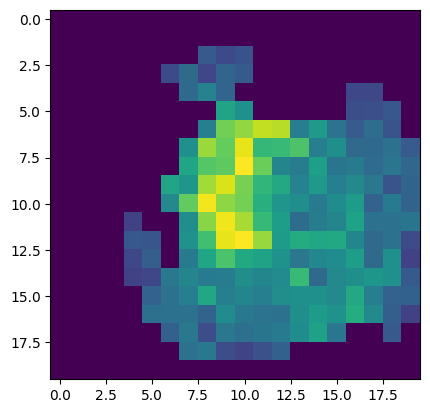

In [131]:
plt.imshow(cleaned_images[5,4,0])

# Get FRET ratio

In [132]:
fret_images = cleaned_images[:,:,0,:,:] / cleaned_images[:,:,1,:,:] 
fret_images = np.nan_to_num(fret_images, nan=0.0)

/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_7831/1176201609.py:1: RuntimeWarning: invalid value encountered in divide
  fret_images = cleaned_images[:,:,0,:,:] / cleaned_images[:,:,1,:,:]


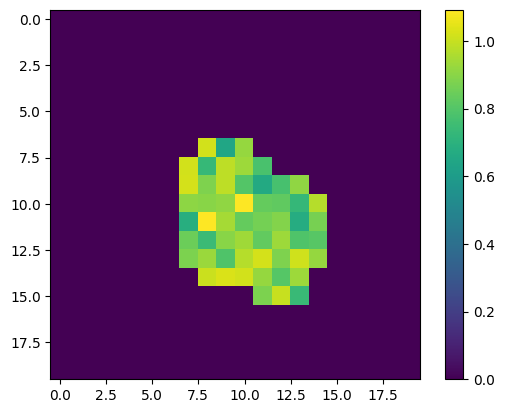

In [153]:
plt.imshow(fret_images[2,10])
plt.colorbar()

In [154]:
problematic_cells = find_problematic_cells_and_times(fret_images)
print("Problematic cells:", problematic_cells)

Problematic cells: []


# Removal of "problematic" cells

In [155]:
fret_images.shape

(192, 1080, 20, 20)

In [164]:
# remove problematic cells
from ipywidgets import interact, IntSlider

def view_cell_at_time(cell_index=0):
    time_point = 10
    plt.figure(figsize=(6, 6))
    plt.imshow(fret_images[cell_index, time_point], cmap='gray')
    plt.title(f'Cell {cell_index}, Time Point {time_point}')
    plt.axis('off')
    plt.show()

interact(view_cell_at_time, 
         cell_index=IntSlider(min=0, max=191, step=1, value=0, description='Cell:'))

interactive(children=(IntSlider(value=0, description='Cell:', max=191), Output()), _dom_classes=('widget-inter…

<function __main__.view_cell_at_time(cell_index=0)>

In [234]:
cell_indexes_to_remove = [19, 33, 48, 91, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136]

cell_indexes_to_remove = sorted(set(cell_indexes_to_remove))

filtered_images = np.delete(fret_images, cell_indexes_to_remove, axis=0)
filtered_y_train = np.delete(y_train, cell_indexes_to_remove, axis=0)


In [237]:
filtered_images.shape

(171, 1080, 20, 20)

In [238]:
filtered_y_train.shape

(171,)

problematic cells: 19, 33, 48, 91, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136
remove empty cells


In [239]:
# Find cells that are NOT empty at time point 10
non_empty_mask = ~np.all(filtered_images[:, 10] == 0, axis=(1, 2))

# Keep only non-empty cells
final_filtered_images = filtered_images[non_empty_mask]
final_filtered_y_train = filtered_y_train[non_empty_mask]

print(f"Removed {np.sum(~non_empty_mask)} empty cells at time point 10")
print(f"Final shape: {final_filtered_images.shape}")

Removed 13 empty cells at time point 10
Final shape: (158, 1080, 20, 20)


### Centering cells

In [240]:
centered_images = center_cells(final_filtered_images)

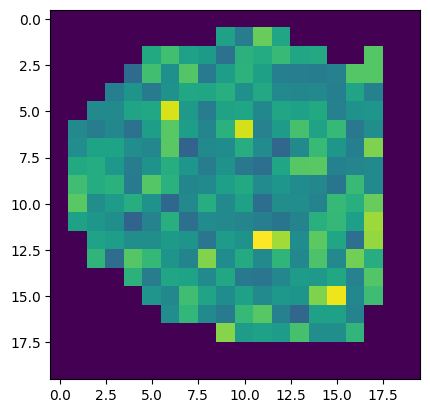

In [241]:
plt.imshow(centered_images[0,0])

In [243]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/centered_images.npy", centered_images)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/y_train.npy", final_filtered_y_train)

# Normalising cells

ABOUT INTENSITIES: (to do next)
- Should I normalise the cells with relation to first generation cells??
- Should I stretch the intensities with the first generation cells??

USE FROM THE TIME POINT 10?? (BECAUSE THE CELL JUST SPLIT) - NEEDS TO BE CHECKED

In [244]:
norm_images = normalize_images_per_frame(centered_images)

/Users/inescunha/Documents/GitHub/AI4CellFate/src/preprocessing/preprocessing_functions.py:431: RuntimeWarning: invalid value encountered in divide
  normalized_images[:,j] = cell_images[:,j] / absolute_max


In [245]:
norm_images.shape

(158, 1080, 20, 20)

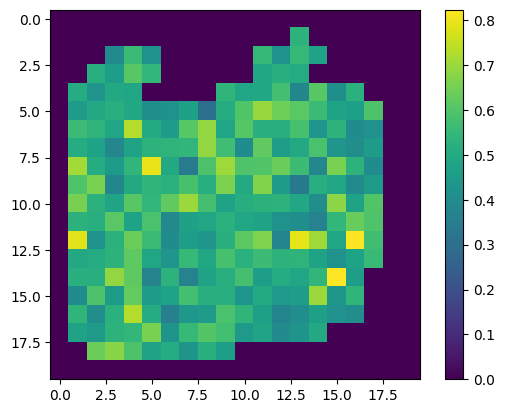

In [246]:
plt.imshow(norm_images[100,0])
plt.colorbar()

# Use trained model to predict

In [214]:
second_gen = centered_images[:,0]

In [247]:
from src.models import Encoder, Decoder, Discriminator, mlp_classifier

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (20, 20, 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/autoencoder_cov/encoder.weights.h5") ###TODO: change to the model path
decoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/autoencoder_cov/decoder.weights.h5") ###TODO: change to the model path
discriminator.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/autoencoder_cov/discriminator.weights.h5") ###TODO: change to the model path

/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [248]:
predicted_latent_space = encoder.predict(second_gen)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


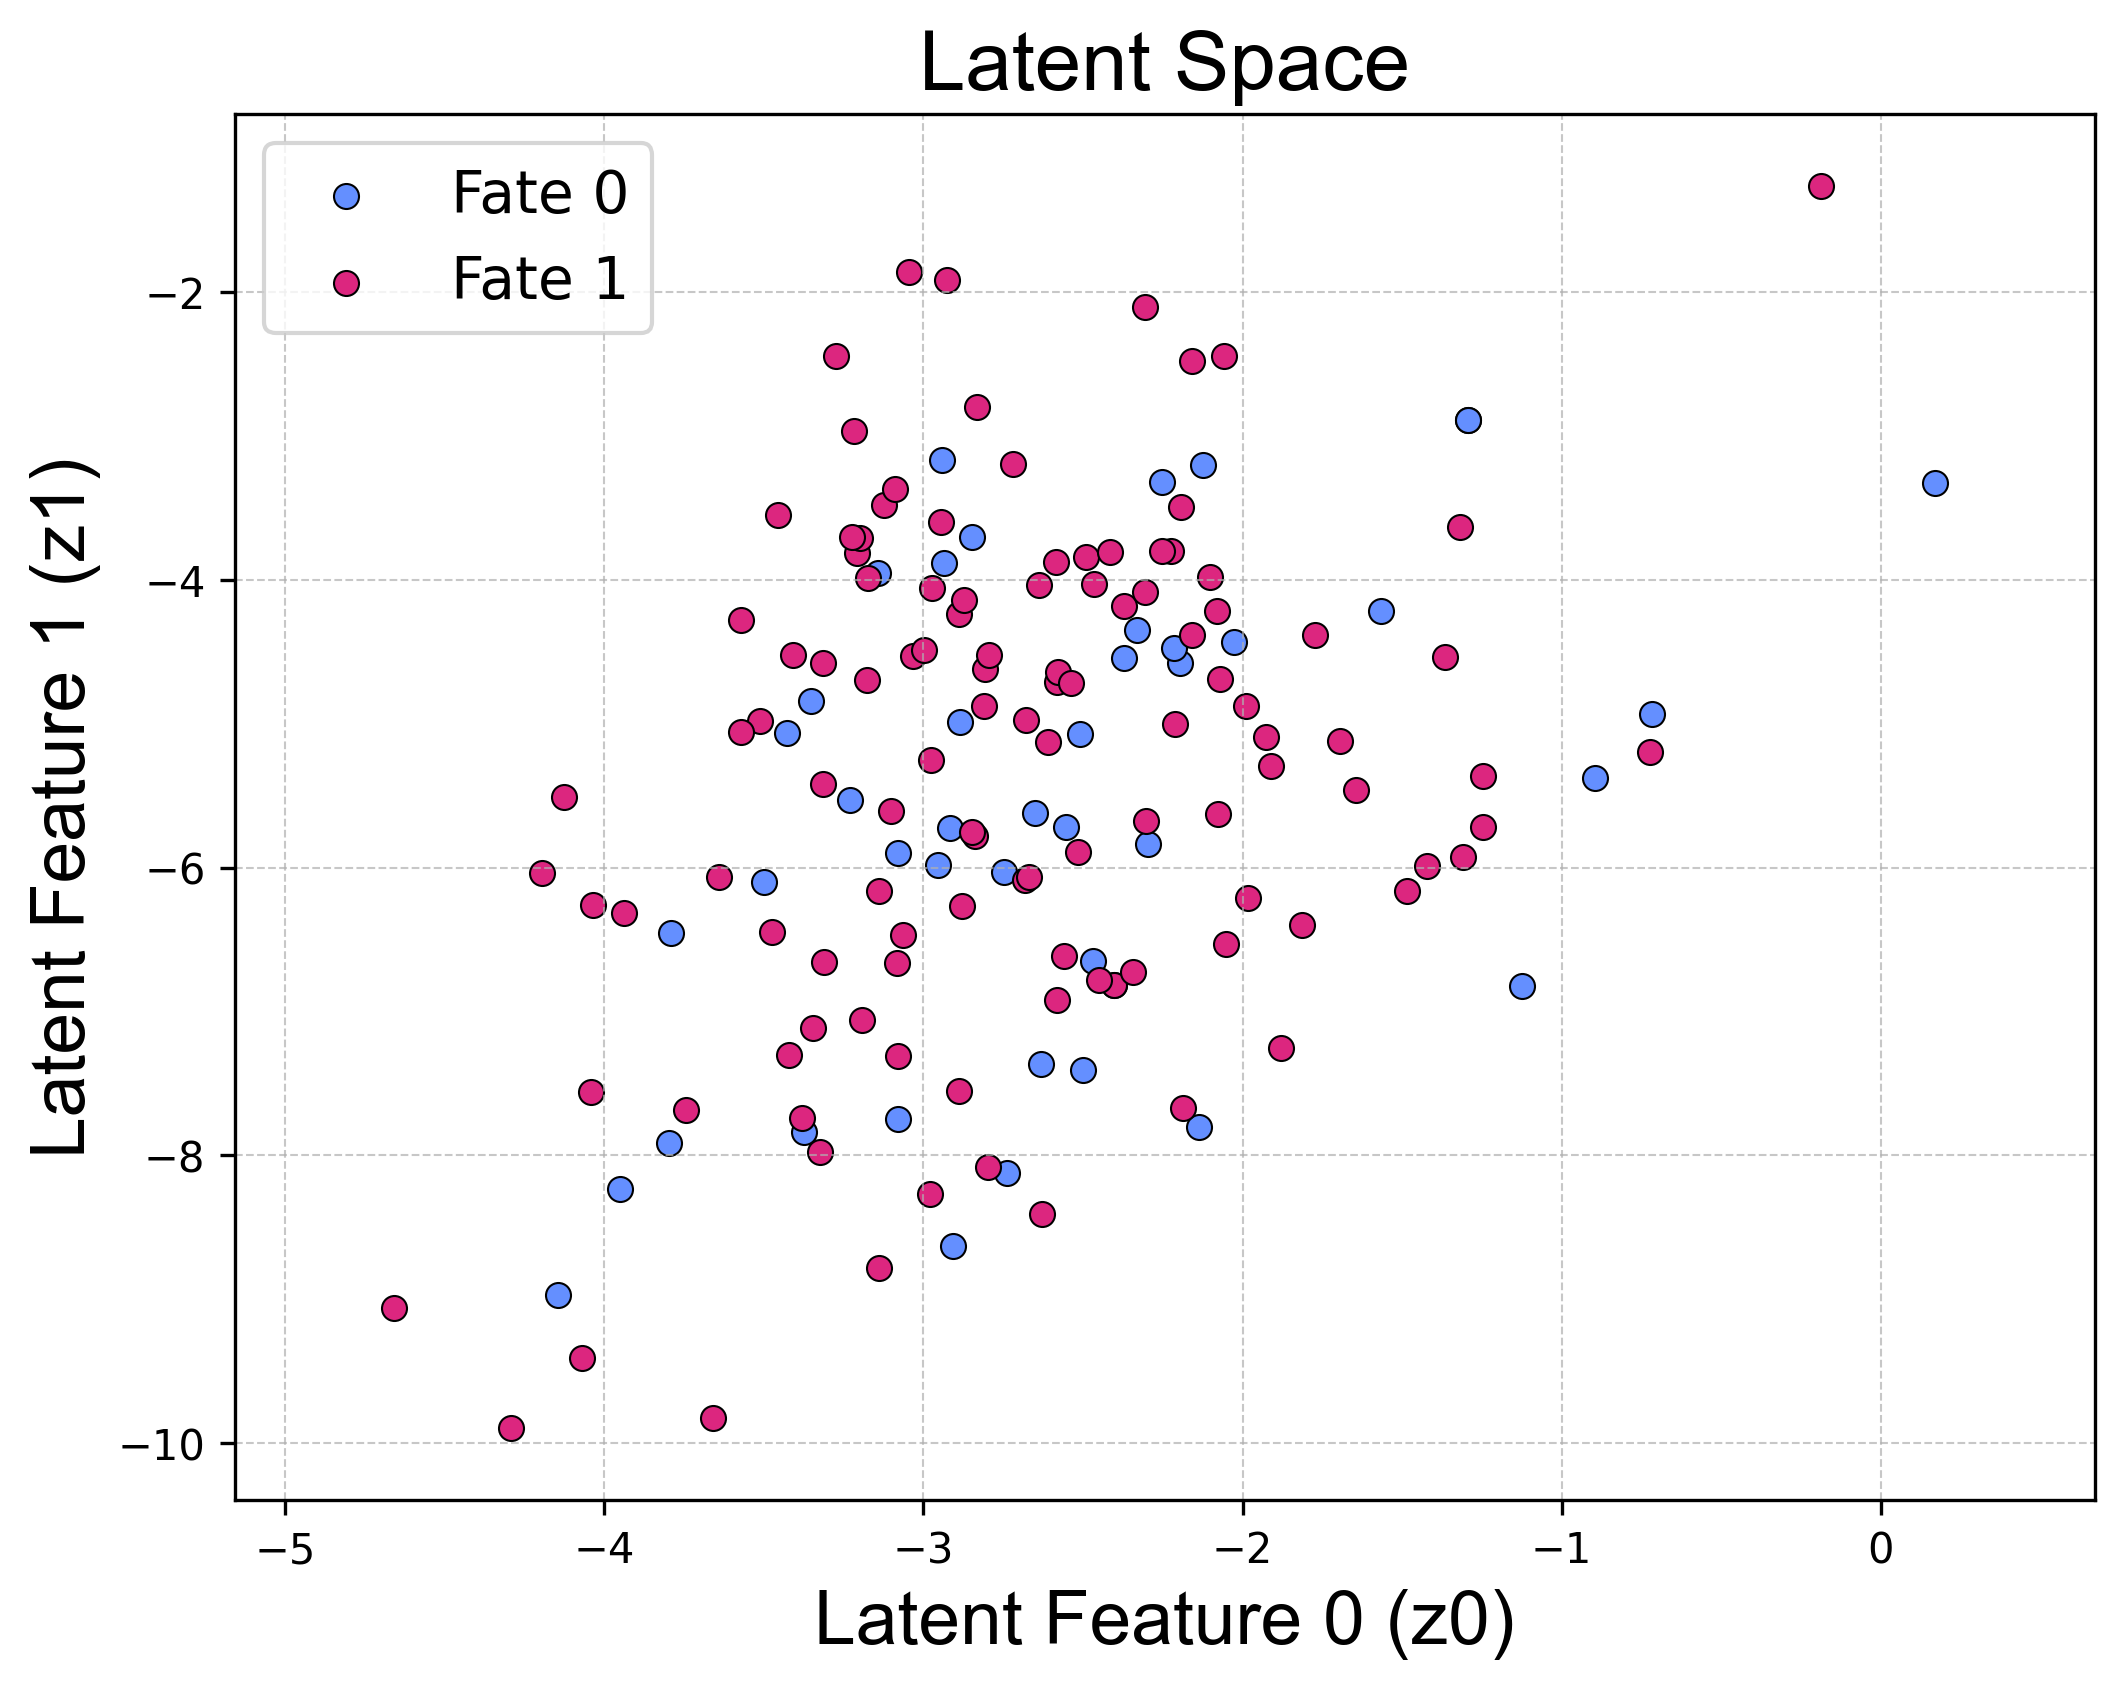

In [249]:
# Predict the latent representations
latent_2d = encoder.predict(second_gen) 

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[final_filtered_y_train == 0][:, 0], latent_2d[final_filtered_y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[final_filtered_y_train == 1][:, 0], latent_2d[final_filtered_y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("rasterised_ls_cellfate.eps", dpi=600, bbox_inches="tight")
plt.show()